In [20]:
import pandas as pd

In [21]:
bank = pd.read_csv("bank.csv")

In [22]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Analyzing the distribution of customers by age, job, marital status, and education to understand the bank's target audience better.

In [23]:
# Displaying the distribution of customers by age, job, marital status, and education

age_distribution = bank ["age"].value_counts()
job_distribution = bank ["job"].value_counts()
marital_distribution = bank ["marital"].value_counts()
education_distribution = bank ["education"].value_counts()

age_distribution.head(), job_distribution.head(), marital_distribution.head(), education_distribution.head()

(age
 31    496
 32    477
 34    466
 33    464
 35    461
 Name: count, dtype: int64,
 job
 management     2566
 blue-collar    1944
 technician     1823
 admin.         1334
 services        923
 Name: count, dtype: int64,
 marital
 married     6351
 single      3518
 divorced    1293
 Name: count, dtype: int64,
 education
 secondary    5476
 tertiary     3689
 primary      1500
 unknown       497
 Name: count, dtype: int64)

In [24]:
# The most common customer age is 31, and the most common job is management. The majority of customers are married and have 
# secondary education. These demographics help understand the bank’s target audience.

# Analyzing the proportion of customers who have defaulted on loans to identify potential risk factors and inform targeted marketing strategies

In [25]:
# Calculating the proportion of customers who have defaulted on loans

loan_default_proportion = bank ["default"].value_counts(normalize=True) * 100

In [26]:
loan_default_proportion

default
no     98.494893
yes     1.505107
Name: proportion, dtype: float64

In [27]:
# In the analysis of loan defaults among our customer base, it was observed that a vast majority, precisely 98.49%, successfully
# met their loan obligations without any defaults. Conversely, a small fraction of customers, amounting to 1.51%, experienced 
# defaults on their loans.

In [28]:
# Calculating the common age ranges for customers who have defaulted on loans

loan_def_age = bank [bank ["default"] == "yes"]["age"].value_counts().head()

In [29]:
loan_def_age

age
27    12
45     8
44     8
42     7
49     7
Name: count, dtype: int64

In [30]:
# Customers aged 27, 45, and 44 are the most common age groups to default on loans. This aids in identifying potential risk 
# factors in every demographic

In [ ]:
# Evaluating the distribution of account balances among customers to identify high-value segments and tailor marketing efforts accordingly.

In [31]:
# Analyzing the distribution of account balances among customers

account_balance = bank ["balance"].describe()

In [32]:
account_balance

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [33]:
# The analysis of account balances among customers shows a mean balance of $1528.54, with a standard deviation of $3225.41, 
# indicating significant variability. The balances range from a minimum of -$6847.00 to a maximum of $81204.00. 
# The 25th, 50th (median), and 75th percentiles are $122.00, $550.00, and $1708.00, respectively.

# Assessing the effectiveness of different contact methods (e.g. cellular) in engaging customers and driving conversions

In [34]:
eff_contact_methods = bank ["contact"].value_counts()

In [35]:
eff_contact_methods

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [36]:
# Conversion rates associated with each contact method

conversion_rates = bank.groupby("contact")["y"].value_counts(normalize=True).unstack()

KeyError: 'Column not found: y'

In [ ]:
# Check the columns in the dataset to find the correct column name for conversion

bank.columns

In [ ]:
bank.columns = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "conversion"]

In [ ]:
conversion_rates = bank.groupby("contact")["conversion"].value_counts(normalize=True).unstack()

In [ ]:
conversion_rates

In [ ]:
# The conversion rates for the different contact methods are as follows: The cellular method has a conversion rate of 54.33% 
# and a non-conversion rate of 45.67%. The telephone method shows a nearly equal distribution with a conversion rate of 50.39% 
# and a non-conversion rate of 49.61%. The method labeled as ‘unknown’ has a significantly lower conversion rate of 22.59%, 
# with a non-conversion rate of 77.41%.

# Analyze the outcomes of marketing campaigns (e.g., success, failure) to identify patterns and factors influencing campaign effectiveness

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

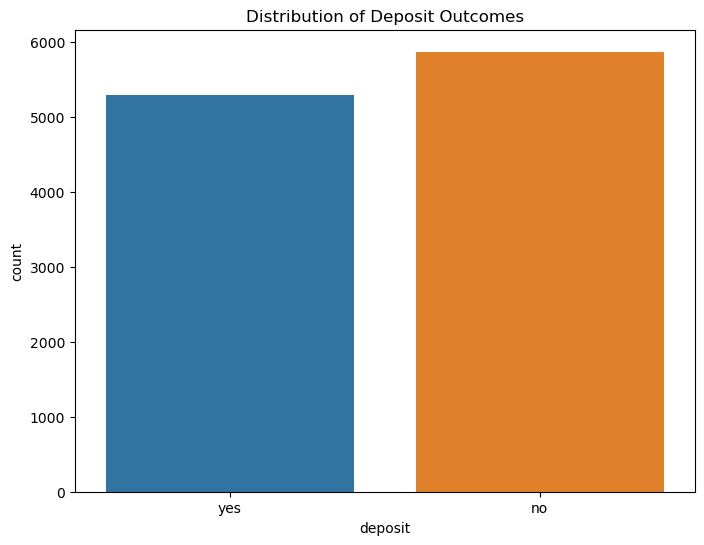

In [42]:
# Plotting the distribution of deposit outcomes

plt.figure(figsize = (8, 6))
sns.countplot(data = bank, x="deposit")
plt.title("Distribution of Deposit Outcomes")
plt.show()

In [ ]:
# The chart above shows the distribution of deposit outcomes in the dataset. This visualization can help us understand the 
# balance between successful and unsuccessful campaign outcomes.

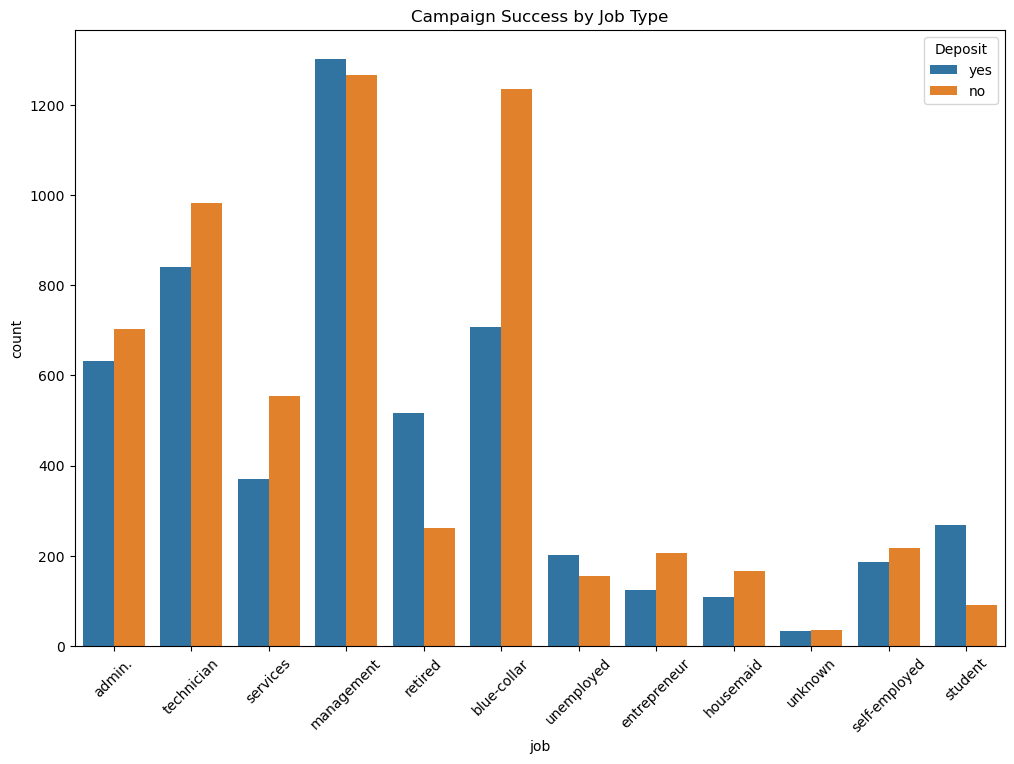

In [43]:
# Breakdown of campaign success by job type

plt.figure (figsize = (12, 8))
sns.countplot (data = bank, x = "job", hue = "deposit")
plt.title ("Campaign Success by Job Type")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

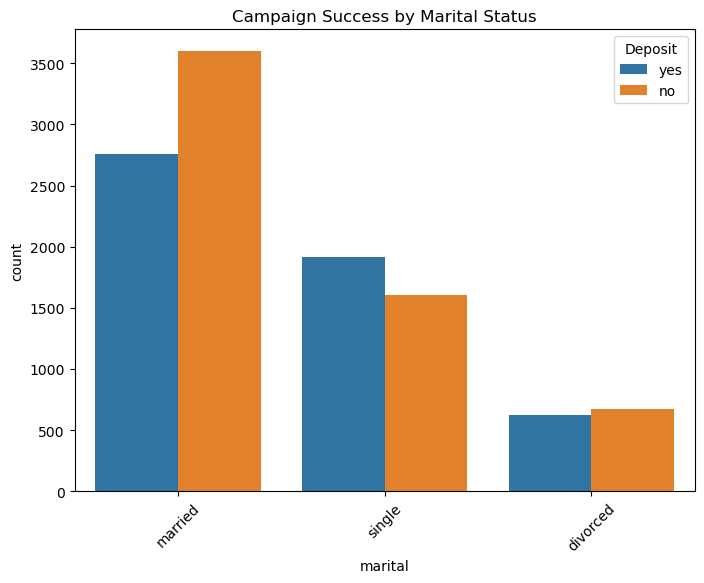

In [46]:
# Breakdown of campaign success by marital status

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "marital", hue = "deposit")
plt.title ("Campaign Success by Marital Status")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

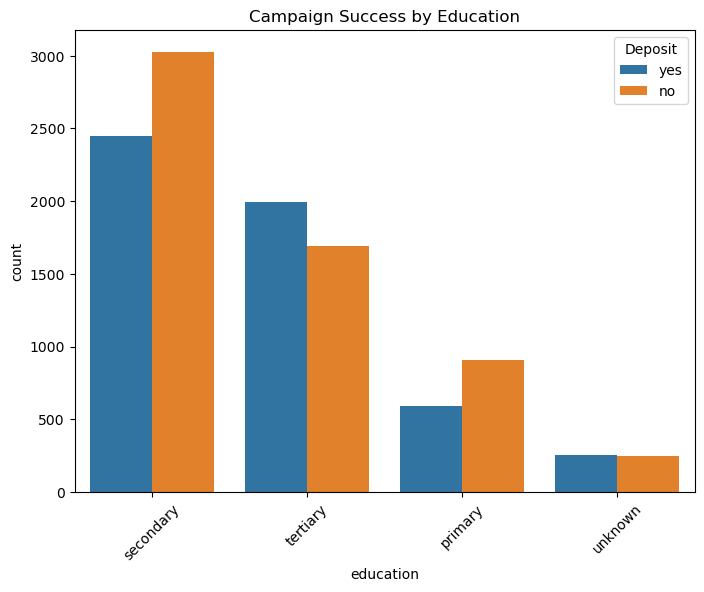

In [52]:
# Breakdown of campaign success by education

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "education", hue = "deposit")
plt.title ("Campaign Success by Education")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

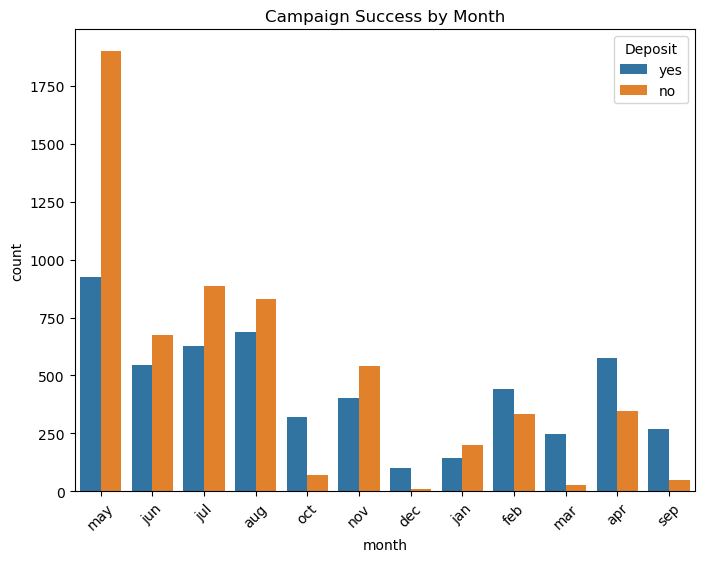

In [51]:
# Breakdown of campaign success by month

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "month", hue = "deposit")
plt.title ("Campaign Success by Month")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

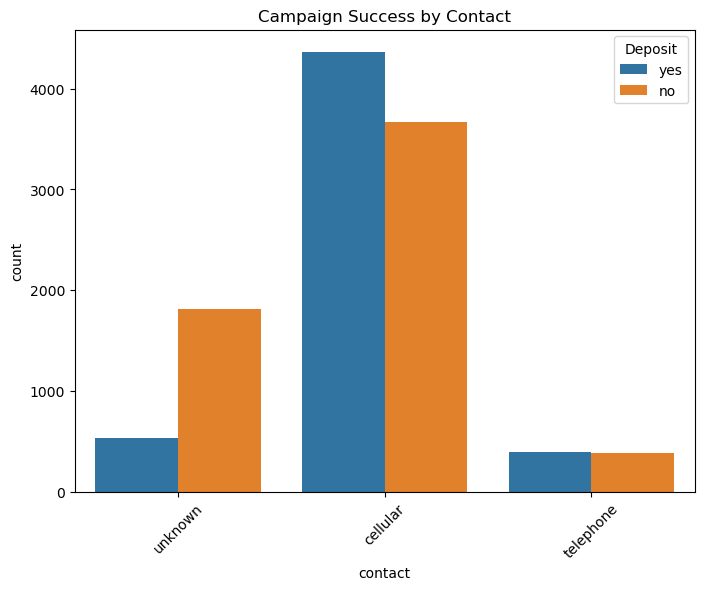

In [53]:
# Breakdown of campaign success by contact

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "contact", hue = "deposit")
plt.title ("Campaign Success by Contact")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

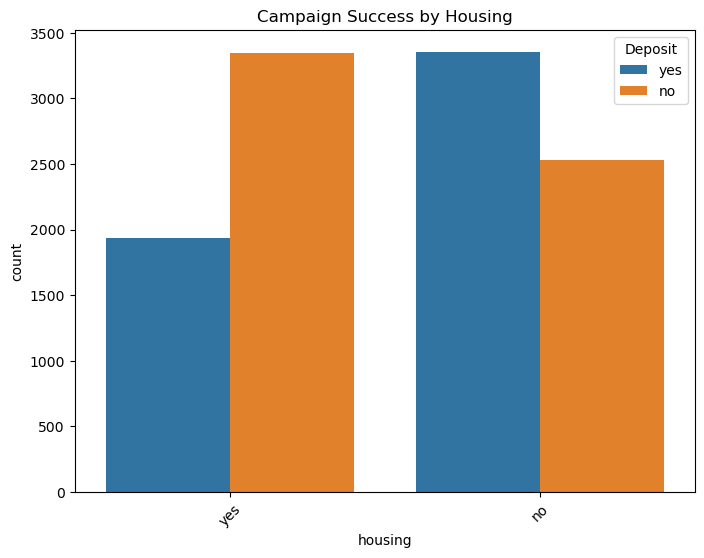

In [54]:
# Breakdown of campaign success by housing

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "housing", hue = "deposit")
plt.title ("Campaign Success by Housing")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

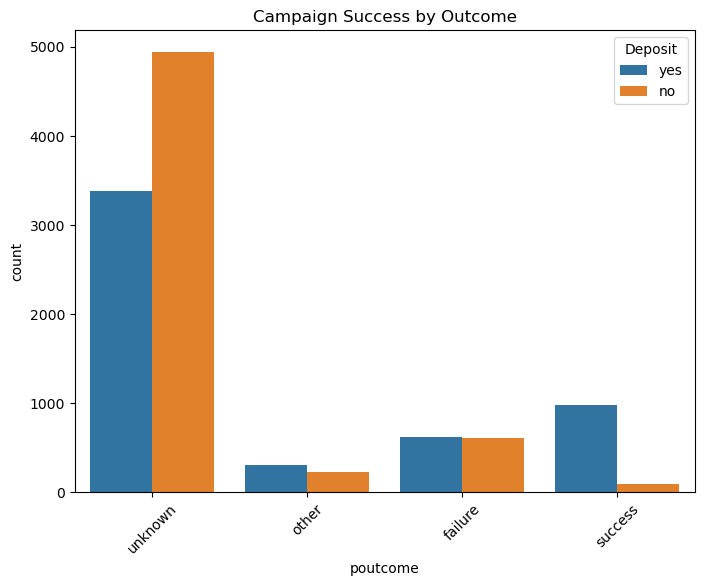

In [55]:
# Breakdown of campaign success by Outcome

plt.figure (figsize = (8, 6))
sns.countplot (data = bank, x = "poutcome", hue = "deposit")
plt.title ("Campaign Success by Outcome")
plt.xticks (rotation = 45)
plt.legend (title = "Deposit", loc = "upper right")
plt.show()

# Evaluating customer engagement(e.g., duration of contact) to identify highly engaged segments for targeted marketing efforts.

In [48]:
# Analyzing customer engagement levels

# Grouping the data by marital status and calculating the mean duration of contact and number of interactions

customer_engagement = bank.groupby("marital")[["duration", "campaign"]].mean()

In [49]:
customer_engagement

,duration,campaign
marital,,
divorced,392.481825,2.457077
married,361.063769,2.621477
single,384.195566,2.323195


In [ ]:
# The average duration of contact and number of interactions vary based on marital status. Divorced customers have the longest 
# average contact duration of 392.48 units and an average of 2.46 interactions. Married customers have a slightly shorter 
# average contact duration of 361.06 units, but a higher average of 2.62 interactions. Single customers have an average contact
# duration of 384.20 units and the fewest interactions, averaging at 2.32.